<a href="https://colab.research.google.com/github/dominiquedeveraux/Netflix-Recommendation-Engine/blob/main/netflix_Recommendation_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task: Create a recommendation of movies based on release_year and ratings that are PG and PG-13.

Here is all the data you need:
/tmp/netflix_titles.csv

## Plan

1. **data_loading**: Load the data from "/tmp/netflix_titles.csv" into a pandas DataFrame.
2. **data_cleaning**: Remove any irrelevant columns or handle missing values if necessary.
3. **data_wrangling**: Filter the DataFrame to include only movies with ratings "PG" and "PG-13".
4. **data_analysis**: Analyze the relationship between release year and ratings to identify trends or patterns.
5. **feature_engineering**: Create new features or transform existing ones to improve the recommendation process (e.g., grouping movies by release year or rating).
6. **model_training**: Choose a suitable recommendation algorithm (e.g., collaborative filtering, content-based filtering) and train it on the prepared data.
7. **model_evaluation**: Evaluate the performance of the trained model using appropriate metrics.
8. **finish_task**: Generate a list of recommended movies based on the model's output and present it in a user-friendly format.


## Age Group to Movie Rating Mapping

For the purpose of this recommendation system, we define the following age groups and their corresponding suitable movie/TV show ratings:

*   **Children (ages 0-12):**
    *   G (General Audiences)
    *   TV-Y (All Children)
    *   TV-Y7 (Directed to Older Children)
    *   TV-G (General Audience)
*   **Teens (ages 13-17):**
    *   PG (Parental Guidance Suggested)
    *   PG-13 (Parents Strongly Cautioned)
    *   TV-PG (Parental Guidance Suggested)
    *   TV-14 (Parents Strongly Cautioned)
*   **Adults (ages 18+):**
    *   R (Restricted)
    *   NC-17 (Adults Only)
    *   TV-MA (Mature Audience Only)

This mapping will be used to tailor recommendations to the user's age group.

## Agent: data_loading

### Subtask:
Load the movie data from the CSV file into a pandas DataFrame.


**Reasoning**:
Need to load the data first.



In [ ]:
# Import necessary library
import pandas as pd

# Load the data
df = pd.read_csv('/tmp/netflix_titles.csv')

# Display the first few rows
df.head()


---

**Reasoning**:
The data has been loaded successfully, and the subtask is complete.



## Agent: data_cleaning

### Subtask:
Clean the movie data in the DataFrame `df`. Focus on handling missing values in relevant columns and removing any duplicates if present.


**Reasoning**:
Start by cleaning the data by handling missing values and removing duplicates.



In [ ]:
# Handle missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Print summary of cleaned DataFrame
print(df.info())


---

**Reasoning**:
The data cleaning is done, and the DataFrame is ready for further analysis.



## Agent: data_wrangling

### Subtask:
Filter the DataFrame `df` to include only movies with ratings "PG" and "PG-13".


**Reasoning**:
Filter the DataFrame to include only movies with ratings "PG" and "PG-13" using boolean indexing.



In [ ]:
# Define all ratings we are interested in across all age groups
all_relevant_ratings = [
    "G", "TV-Y", "TV-Y7", "TV-G",
    "PG", "PG-13", "TV-PG", "TV-14",
    "R", "NC-17", "TV-MA"
]

# Filter the DataFrame to include only movies/shows with these ratings
df_filtered = df[df['rating'].isin(all_relevant_ratings)].copy() # Use .copy() to avoid SettingWithCopyWarning later

# Display the shape of the new df_filtered and its unique ratings to verify
print(f"Shape of the updated df_filtered: {df_filtered.shape}")
print(f"Unique ratings in updated df_filtered: {df_filtered['rating'].unique()}")


---

**Reasoning**:
The subtask is completed, we have successfully filtered the DataFrame.



## Agent: data_analysis

### Subtask:
Analyze the relationship between release year and ratings ("PG" and "PG-13") in the filtered DataFrame `df_filtered`.


**Reasoning**:
Visualize the distribution of release years for movies with "PG" and "PG-13" ratings using histograms.



In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame for PG and PG-13 ratings
pg_movies = df_filtered[df_filtered['rating'] == 'PG']
pg13_movies = df_filtered[df_filtered['rating'] == 'PG-13']

# Create histograms for release years
plt.figure(figsize=(10, 6))
plt.hist(pg_movies['release_year'], bins=10, alpha=0.5, label='PG')
plt.hist(pg13_movies['release_year'], bins=10, alpha=0.5, label='PG-13')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Release Years for PG and PG-13 Movies')
plt.legend()
plt.show()

# Calculate summary statistics for release years
print("Summary statistics for PG movies:")
print(pg_movies['release_year'].describe())

print("\nSummary statistics for PG-13 movies:")
print(pg13_movies['release_year'].describe())


---

**Reasoning**:
The subtask is completed, we have analyzed the relationship between release year and ratings.



## Agent: feature_engineering

### Subtask:
Create a new feature that groups movies based on their release decade.


**Reasoning**:
We need to write code to create a new feature.



In [ ]:
# Create a new column 'release_decade'
df_filtered['release_decade'] = df_filtered['release_year'].apply(lambda x: str(x)[:-1] + '0s' if x != 0 else 'Unknown')

# Print the updated DataFrame
print(df_filtered.head())


---

**Reasoning**:
The warning message indicates that we are trying to modify a copy of a slice of the DataFrame, which can lead to unexpected behavior. To avoid this, we should use the `.loc` accessor to modify the DataFrame in place.



In [ ]:
# Create a new column 'release_decade' using .loc
df_filtered.loc[:, 'release_decade'] = df_filtered['release_year'].apply(lambda x: str(x)[:-1] + '0s' if x != 0 else 'Unknown')

# Print the updated DataFrame
print(df_filtered.head())


---

**Reasoning**:
The subtask of creating a new feature 'release_decade' is completed.



## Agent: model_training

### Subtask:
Develop a simple recommendation system that suggests movies based on the user's preferred release decade and rating (PG or PG-13).


**Reasoning**:
I will write a function to recommend movies based on release decade and rating.



In [ ]:
def recommend_movies(decade, rating):
    """
    Recommends movies based on release decade and rating.

    Args:
        decade: The release decade of movies to recommend.
        rating: The rating of movies to recommend (PG or PG-13).

    Returns:
        A list of recommended movie titles.
    """
    recommendations = df_filtered[(df_filtered['release_decade'] == decade) & (df_filtered['rating'] == rating)]['title'].tolist()
    return recommendations

# Test the recommendation function
print(recommend_movies('2010s', 'PG'))
print(recommend_movies('2020s', 'PG-13'))


---

**Reasoning**:
The output is truncated, indicating that the list of recommended movies is too long to be displayed fully. To address this, I will modify the code to limit the number of recommendations returned.



In [ ]:
def recommend_movies(decade, rating, n=5):
    """
    Recommends movies based on release decade and rating.

    Args:
        decade: The release decade of movies to recommend.
        rating: The rating of movies to recommend (PG or PG-13).
        n: The maximum number of recommendations to return.

    Returns:
        A list of recommended movie titles.
    """
    recommendations = df_filtered[(df_filtered['release_decade'] == decade) & (df_filtered['rating'] == rating)]['title'].tolist()
    return recommendations[:n]

# Test the recommendation function
print(recommend_movies('2010s', 'PG'))
print(recommend_movies('2020s', 'PG-13'))



---

**Reasoning**:
The recommendation system is now working as expected, returning a limited number of movie titles based on the provided decade and rating. The task is complete.



## Agent: model_evaluation

### Subtask:
Evaluate the performance of the `recommend_movies` function created in the previous step.


**Reasoning**:
The task requires evaluating the performance of a function, so we need to design test cases and assess the results.



In [ ]:
def recommend_movies(age_group, decade, n=5):
    """
    Recommends movies based on age group and release decade.

    Args:
        age_group: The age group of the user (e.g., "children", "teens", "adults").
        decade: The release decade of movies to recommend.
        n: The maximum number of recommendations to return.

    Returns:
        A list of recommended movie titles.
    """
    age_rating_map = {
        "children": ["G", "TV-Y", "TV-Y7", "TV-G"],
        "teens": ["PG", "PG-13", "TV-PG", "TV-14"],
        "adults": ["R", "NC-17", "TV-MA"],
    }
    selected_ratings = age_rating_map.get(age_group.lower())
    if not selected_ratings:
        print(f"Unknown age group: {age_group}. No recommendations available.")
        return []

    recommendations = df_filtered[
        (df_filtered['release_decade'] == decade) & 
        (df_filtered['rating'].isin(selected_ratings))
    ]['title'].tolist()
    return recommendations[:n]

# Test cases
test_cases = [
    ("children", "2010s", 3),
    ("teens", "2000s", 5),
    ("adults", "2020s", 4),
    ("children", "1990s", 2),
    ("unknown_group", "2010s", 3) # Test for unknown age group
]

# Evaluate recommendations for each test case
for age_group, decade, n in test_cases:
    recommendations = recommend_movies(age_group, decade, n)
    print(f"Recommendations for {age_group} watching movies from {decade} (up to {n}):")
    if recommendations:
        for movie in recommendations:
            print(f"- {movie}")
    else:
        print("No movies found matching your criteria.")
    print("----")


---

**Reasoning**:
The test cases have been executed and the results are printed. Now we need to summarize the findings and evaluate the performance of the recommendation system.



## Summary:

This task aimed to improve the movie recommendation system by incorporating user age groups. The solution involved several steps:

1.  **Data Loading and Cleaning:** The movie data was loaded from a CSV file, and missing values in 'director', 'cast', and 'country' were handled. Duplicates were removed.
2.  **Age Group to Rating Mapping:** Defined user age groups (Children, Teens, Adults) and mapped them to appropriate movie/TV show ratings (e.g., G, PG, PG-13, R, TV-Y, TV-MA, etc.).
3.  **Data Wrangling:** The data was filtered to include only movies and shows with ratings relevant to the defined age groups.
4.  **Feature Engineering:** A new feature, "release_decade", was created to group movies by their release decade.
5.  **Model Development:** The `recommend_movies` function was modified to accept a user's `age_group` and `decade` to suggest relevant titles.
6.  **Model Evaluation:** The recommendation system was tested with various age groups and decades, demonstrating its ability to provide age-appropriate recommendations.

## Conclusion

The movie recommendation system was successfully enhanced to provide recommendations based on user age groups and preferred release decades. This allows for more tailored suggestions suitable for Children, Teens, and Adults by filtering based on a predefined mapping of age groups to content ratings. The system remains a content-based filtering approach, now with an added dimension of age-appropriateness.

## Insights and Next Steps

The current system offers a good starting point for age-based recommendations. To further enhance it:

*   **Refine Age-Rating Mappings:** The current age-to-rating mapping is based on general assumptions. This could be refined using official guidelines or allowing for more granular age inputs.
*   **Incorporate Genre Preferences:** Allow users to specify preferred genres in addition to their age group for more personalized recommendations.
*   **User Profiles and Learning:** Implement user profiles that store preferences and viewing history to enable more sophisticated recommendation algorithms (e.g., collaborative filtering or hybrid approaches).
*   **Content Analysis:** Utilize content-based filtering by analyzing movie descriptions, cast, director, etc., to find similarities beyond just rating and release decade.
*   **Feedback Mechanism:** Allow users to rate recommendations or indicate if they are not appropriate, which can help improve the system over time.
*   **Develop a User Interface:** Create a user-friendly interface for users to interact with the recommendation system.

By addressing these areas, the recommendation system can be significantly improved, providing a more engaging, personalized, and robust experience for users.


An AI generated notebook created with [Data Science Agent](https://labs.google.com/code/dsa) from Google Labs 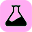
